# Assignment 4
### Do three of four.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1: Contingent Comparisons
- Load the Minnesota use of force data.
- Bootstrap the proportion of missing values for `subject_injury` for each race, and plot the results with grouped KDE and ECDF plots
- Describe what you see. When we consider second order uncertainty, how similar or different are the sampling distributions of these proportions? 

### Exercise 2: Invitation to Inference
- Run the simulation code line by line and comment what each line is doing, or write your own code to do the resampling
- Open the NHANES or Ames prices or College Completion data. Pick a variable and a statistic to compute (e.g. mean, median, variance, IQR)
- Use the `simulate` function from class to get a sample of estimates for your statistic and your data
- Create a new function, `interval(L,H,estimates)`, that computes the $L$-th and $H$-th quantiles for your estimates, $H>L$
- If $L=.05$ and $H=.95$, this is a **90-percent confidence interval**: "For our statistic, this interval captures the true value of the population parameter 90 percent of the time. (We are 90% **confident** that it includes the true value of the parameter, but the probability that the true parameter lies in this interval is 0 or 1.)"
- We will spend much more time on this later in class, but for people who have done hypothesis testing before, you now know how to do it directly from the data: No central limit theorem required.

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

### Exercise 3: Intro to A/B Testing
- Go here, and read about this study: https://www.clinicaltrials.gov/study/NCT01985360
- Read the Study Overview and explain what the goal of the trial is 
- Read the Study Plan and explain how it was designed and why -- there's lots of medical jargon, but the main point is how patients were assigned to interventions. 
- Read the Results Posted: Go to **Outcome Measures**. Explain how table 1 ("Incidence of Death from Any Cause or Myocardial Infarction") is a contingency table. These are the data for this exercise.
- What is the difference in surival rates between the invasive strategy and the conservative strategy?
- Bootstrap the survival rates for the two groups, and plot them as KDEs and ECDFs against one another
- Bootstrap the difference in surival rates, and plot it as a KDE and ECDF
- Is this an effective health intervention? Explain your answer clearly

This would be what CS people call **A/B testing** and everyone else called a **randomized controlled trial**: Using randomized assignment to detect the difference in outcomes between two groups. (We've just done a non-parametric version of a two-sample t-test.)

Goal of the Trial: The purpose of the ISCHEMIA-CKD trial is to determine the best management strategy for patients with stable ischemic heart disease 
Plan: They have an invasive strategy where the patients get "cardiac catheterization followed by revascularization (Percutaneous Coronary Intervention or Coronary Artery Bypass Graft Surgery) plus optimal medical therapy." or a conservative strategy where the patients get "Optimal medical therapy with cardiac catheterization and revascularization reserved for patients with OMT failure." Patients were randomly assigned to the interventions 

The invasive strategy has a death rate of 31.7% while the conservative strategy has a rate of 33.2%

In [13]:
data = {
    "strategy": ["Invasive", "Conservative"],
    "population": [388, 389],
    "prop_death": [0.317, 0.332]
}

df_info = pd.DataFrame(data)


rows = []
for _, row in df_info.iterrows():
    n = row["population"]
    n_deaths = int(round(n * row["prop_death"]))
    n_survive = n - n_deaths
    
   
    outcomes = np.array([1]*n_deaths + [0]*n_survive)
    np.random.shuffle(outcomes) 
    
    
    group_df = pd.DataFrame({
        "strategy": row["strategy"],
        "outcome": outcomes
    })
    
    rows.append(group_df)

df = pd.concat(rows, ignore_index=True)
df.head()

,strategy,outcome
0,Invasive,0
1,Invasive,0
2,Invasive,0
3,Invasive,0
4,Invasive,1


In [4]:
def simulate(var, df, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = df[var]

    estimates = []
    for s in range(S):
        # Draw a new sample, with replacement:
        x_s = x.sample(frac=1.0,replace=True)
        # Compute statistic:
        stat_s = fcn(x_s)
        # Append estimate:
        estimates.append(stat_s)
    estimates = np.array(estimates) # Convert estimates list to numpy array

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    if plot:
        fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
        sns.kdeplot(x, ax = axes[0]).set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1]).set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(x), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2]).set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(x), color='orange', linestyle='--')
        plt.show()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

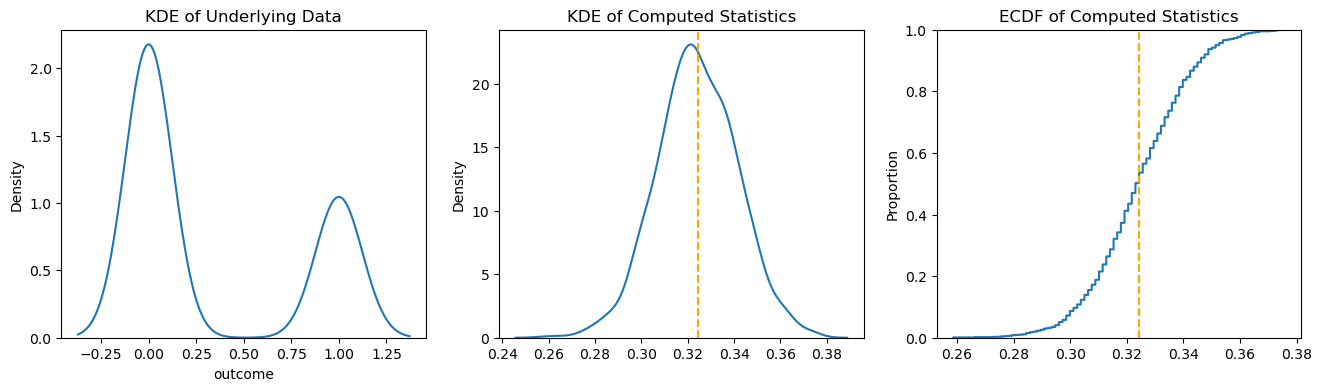

Variance of estimates is: 0.0002956880255876395


In [19]:
var = 'outcome'
def stat(x):
    stat = np.mean(x)
    return stat
estimates = simulate(var, df,stat)

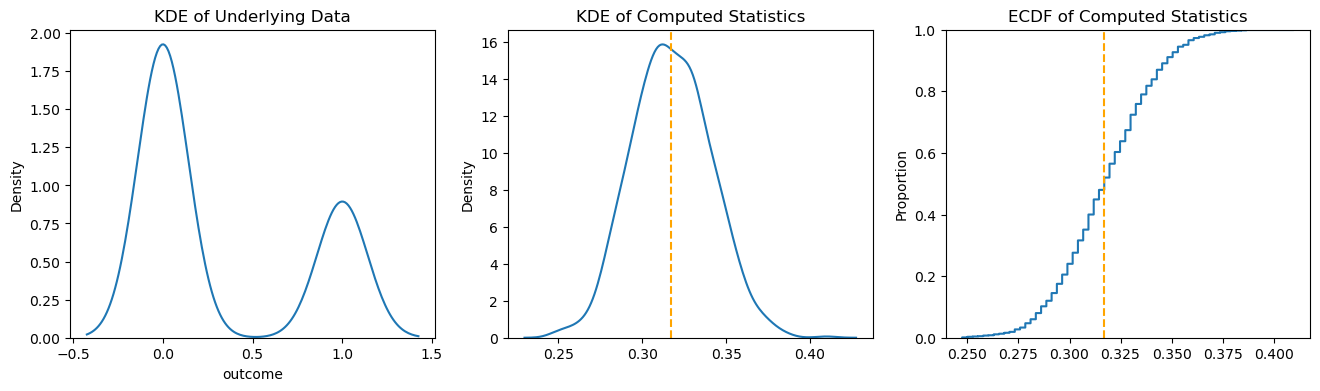

Variance of estimates is: 0.0005505526623445638


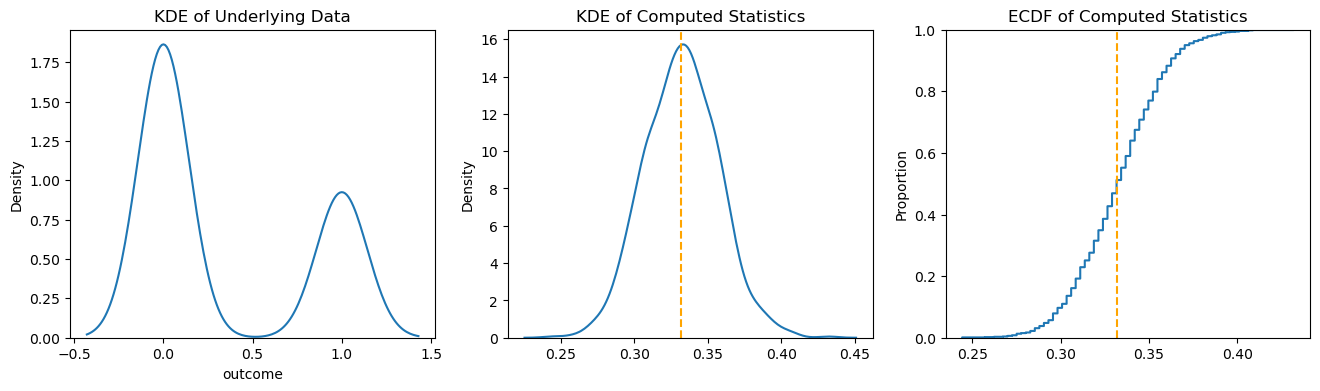

Variance of estimates is: 0.0006209381050878596


In [20]:
invasive_est = simulate('outcome', df[df['strategy']=='Invasive'], stat)
conservative_est = simulate('outcome', df[df['strategy']=='Conservative'], stat)

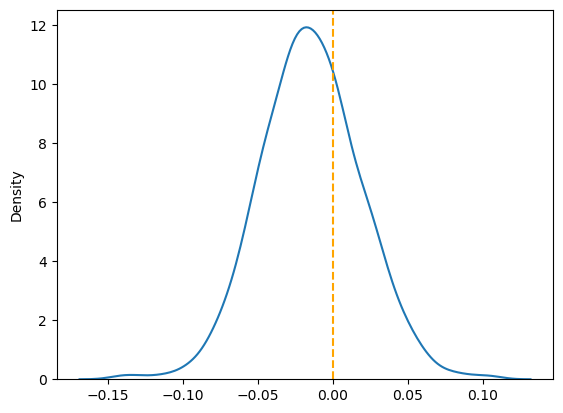

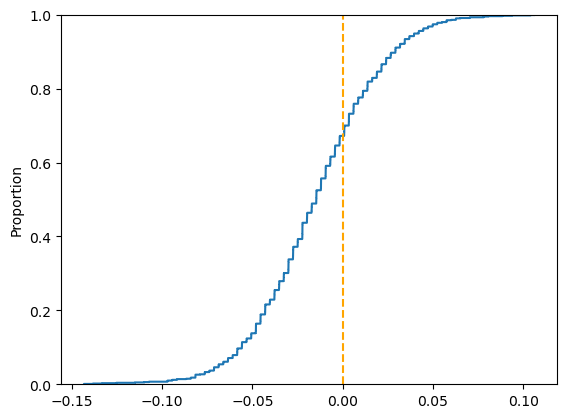

In [22]:
diff_est = invasive_est - conservative_est
sns.kdeplot(diff_est)
plt.axvline(0, color="orange", linestyle="--")
plt.show()
sns.ecdfplot(diff_est)
plt.axvline(0, color="orange", linestyle="--")
plt.show()

- The goal of the trial is to find the best 'management strategy' to treat patients with stable ischemic heart disease. 

- The study was designed to determine the best management strategy by observing two sets of patients, one group that underwent a more invasive intervention strategy involving "cardiac catheterization" and revascularization, and another that underwent a more conservative strategy. Participants were randomly assigned to these intervention groups. 

- Table 1 is a contingency table because it is essentially a crosstab between a column of data one might label "Strategy Used" and a column of booleans which could be labeled "Alive" and would only have values True/False (much like the contingency tables we made where "isNA" can only be True/False). 

- The invasive strategy had a 31.7% incidence of death and the conservative strategy had a 33.2% indicdence of death. The difference in survival rates is 1.5%.

(CREDIT TO PROFESSOR JOHNSON FOR THE MAJORITY OF THE FOLLOWING CODE)

0.683 0.669
Variance of estimates is: 0.00019204851099999915
Variance of estimates is: 0.00021931540399999978


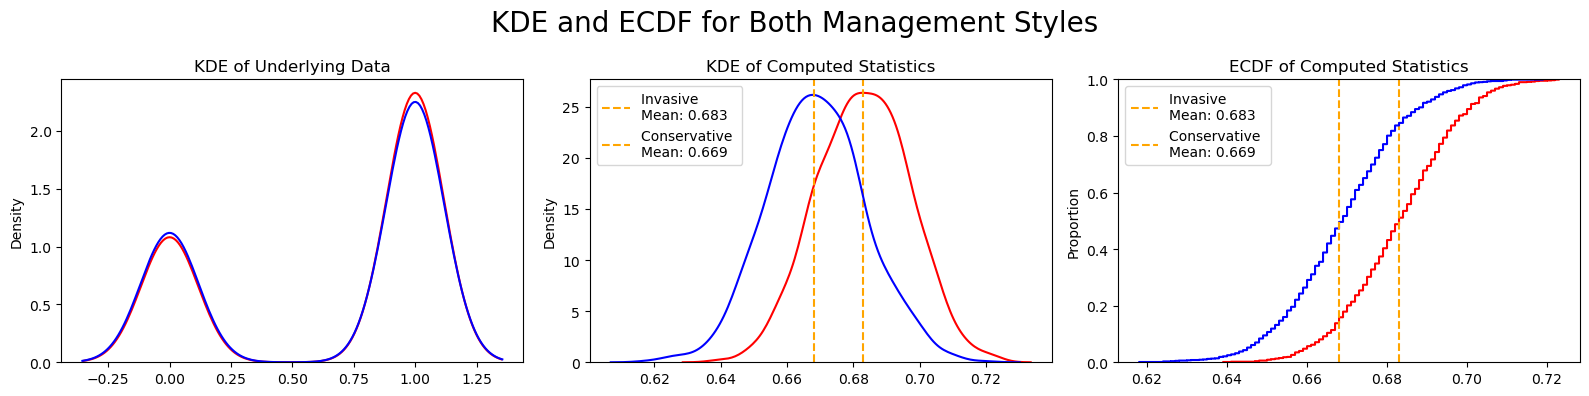

In [32]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

a = np.zeros(317)
b = np.ones(683)
invasive = np.append(a, b)

b

x = np.zeros(332)
y = np.ones(668)
conservative = np.append(x, y)

def simulate(var1,var2, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x1 = pd.Series(var1)
    x2 = pd.Series(var2)

    estimates1 = []
    estimates2 = []

    def sample(x, estimates):
        for s in range(S):
            # Draw a new sample, with replacement:
            x_s = x.sample(frac=1.0,replace=True)
            # Compute statistic:
            stat_s = fcn(x_s)
            # Append estimate:
            estimates.append(stat_s)
        estimates = np.array(estimates) # Convert estimates list to numpy array

    sample(x1, estimates1)
    sample(x2, estimates2)

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    mymean1=round(np.mean(estimates1), 3)
    mymean2=round(np.mean(estimates2), 3)
    print(mymean1, mymean2)

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
    if plot:
        for x, estimates in [[x1,estimates1], [x2,estimates2]]: #[x1,x2]:
            if np.mean(x) == mymean1:
                statement = f'Invasive \nMean: {mymean1}'
                c='r'
            else:
                statement = f'Conservative \nMean: {mymean2}'
                c='b'
            sns.kdeplot(x, ax = axes[0], color=c).set(title='KDE of Underlying Data')
            sns.kdeplot(estimates, ax = axes[1], color=c).set(title='KDE of Computed Statistics')
            axes[1].axvline(x=fcn(x), color='orange', linestyle='--', label=f'{statement}')
            sns.ecdfplot(estimates, ax = axes[2], color=c).set(title='ECDF of Computed Statistics')
            axes[2].axvline(x=fcn(x), color='orange', linestyle='--', label=f'{statement}')
            axes[1].legend()
            axes[2].legend()
            fig.suptitle('KDE and ECDF for Both Management Styles', fontsize=20)
            fig.tight_layout()
            print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates1, estimates2

estimates1, estimates2 = simulate(invasive, conservative, np.mean, plot=True)

plt.show()

/tmp/ipykernel_42344/3669413847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/tmp/ipykernel_42344/3669413847.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[2].legend()


Variance of estimates is: 0.00044439060399999896


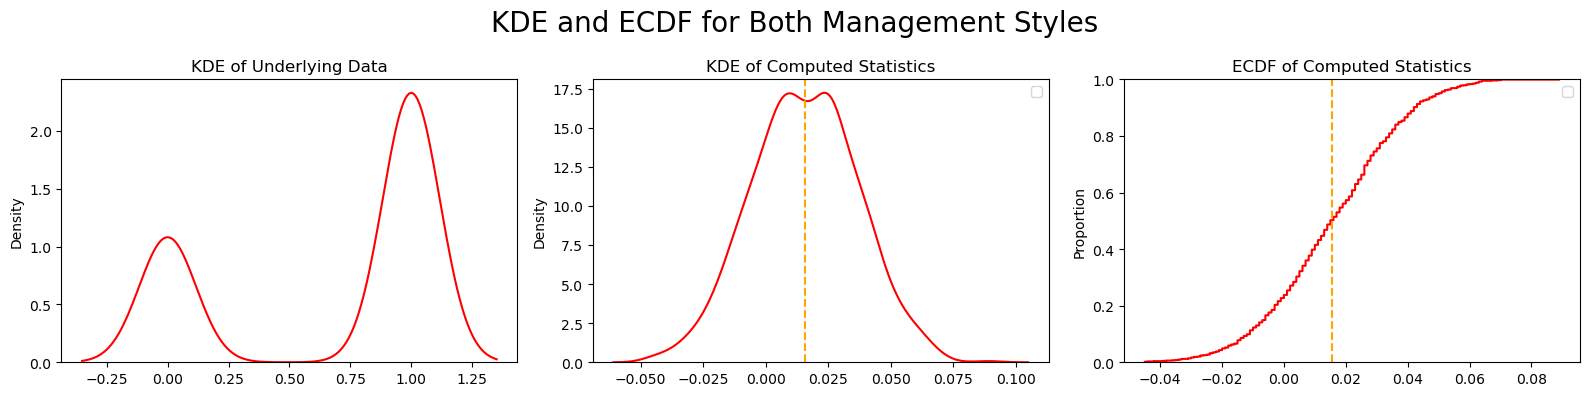

In [44]:
def simulate(var1, var2, fcn, S=1000, plot=True):
    ''' Bootstrap simulation code. '''    
    x = pd.Series(var1)
    y = pd.Series(var2)

    estimates1 = []
    estimates2 = []

    def sample(x, estimates):
        for s in range(S):
            # Draw a new sample, with replacement:
            x_s = x.sample(frac=1.0,replace=True)
            # Compute statistic:
            stat_s = fcn(x_s)
            # Append estimate:
            estimates.append(stat_s)
        estimates = np.array(estimates) # Convert estimates list to numpy array

    sample(x, estimates1)
    sample(y, estimates2)

    estimates = np.array(estimates1) - np.array(estimates2)

    ## or in one line, 
    #estimates = [fcn(x.sample(frac=1.0,replace=True)) for s in range(S)]

    mymean=round(np.mean(estimates), 3)

    fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 2 columns
    if plot:
        sns.kdeplot(x, ax = axes[0], color='r').set(title='KDE of Underlying Data')
        sns.kdeplot(estimates, ax = axes[1], color='r').set(title='KDE of Computed Statistics')
        axes[1].axvline(x=fcn(estimates), color='orange', linestyle='--')
        sns.ecdfplot(estimates, ax = axes[2], color='r').set(title='ECDF of Computed Statistics')
        axes[2].axvline(x=fcn(estimates), color='orange', linestyle='--')
        axes[1].legend()
        axes[2].legend()
        fig.suptitle('KDE and ECDF for Both Management Styles', fontsize=20)
        fig.tight_layout()
        print(f'Variance of estimates is: {np.var(estimates)}')
        
    return estimates

estimates = simulate(invasive, conservative, np.mean, plot=True)

plt.show()

It seems that this health intervention is not very effective, since the difference in survival rate between the two methods is very low.

### Exercise 4: Prediction Uncertainty
- Pick a dataset and two continuous variables.
- Recall the LCLS estimator:
$$
\hat{y}(z) =  \frac{ \frac{1}{N} \sum_{i=1}^N y_i \times \frac{1}{h}k\left( \frac{z - x_i}{h} \right)}{ \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k\left( \frac{z - x_i}{h} \right)}
$$
with the Epanechnikov kernel and the standard plug-in bandwidth for $h$
- Compute and plot this line for 30 bootstrap samples. Notice where there is a lot of variation in the predictions, versus little variation in the predictions.
- Now, for any $z$, we can bootstrap a distribution of predictions using the above formula. Do this at the 25th percentile, median, and 75th percentile of $X$, and make KDE plots of your results.
- Now, pick a grid for $z$: Obvious choices are all of the unique values in the data, or an equally spaced grid from the minimum value to the maximum value. For each $z$, bootstrap a sample of predictions and compute the .05 and .95 quantiles. Plot these error curves along with your LCLS estimate. Where are your predictions "tight"/reliable? Where are they highly variable/unreliable?